# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **


In [37]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from math import ceil
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [38]:
df = pd.read_csv("../dataset/df_explore.csv")

## <span style="color:salmon">2. Pre-processing Data </span> 

#### <span style="color:salmon">2.1 Features</span> 

First, we need to divide the columns that have metric features:

In [39]:
non_metric_features = ["customer_region", "last_promo", "payment_method"]
metric_features = df.columns.drop(non_metric_features)
metric_features

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

##### <span style="color:salmon"> 2.1.1 Numerical features </span>

To see better the distribution of metric features, we need to create histograms:

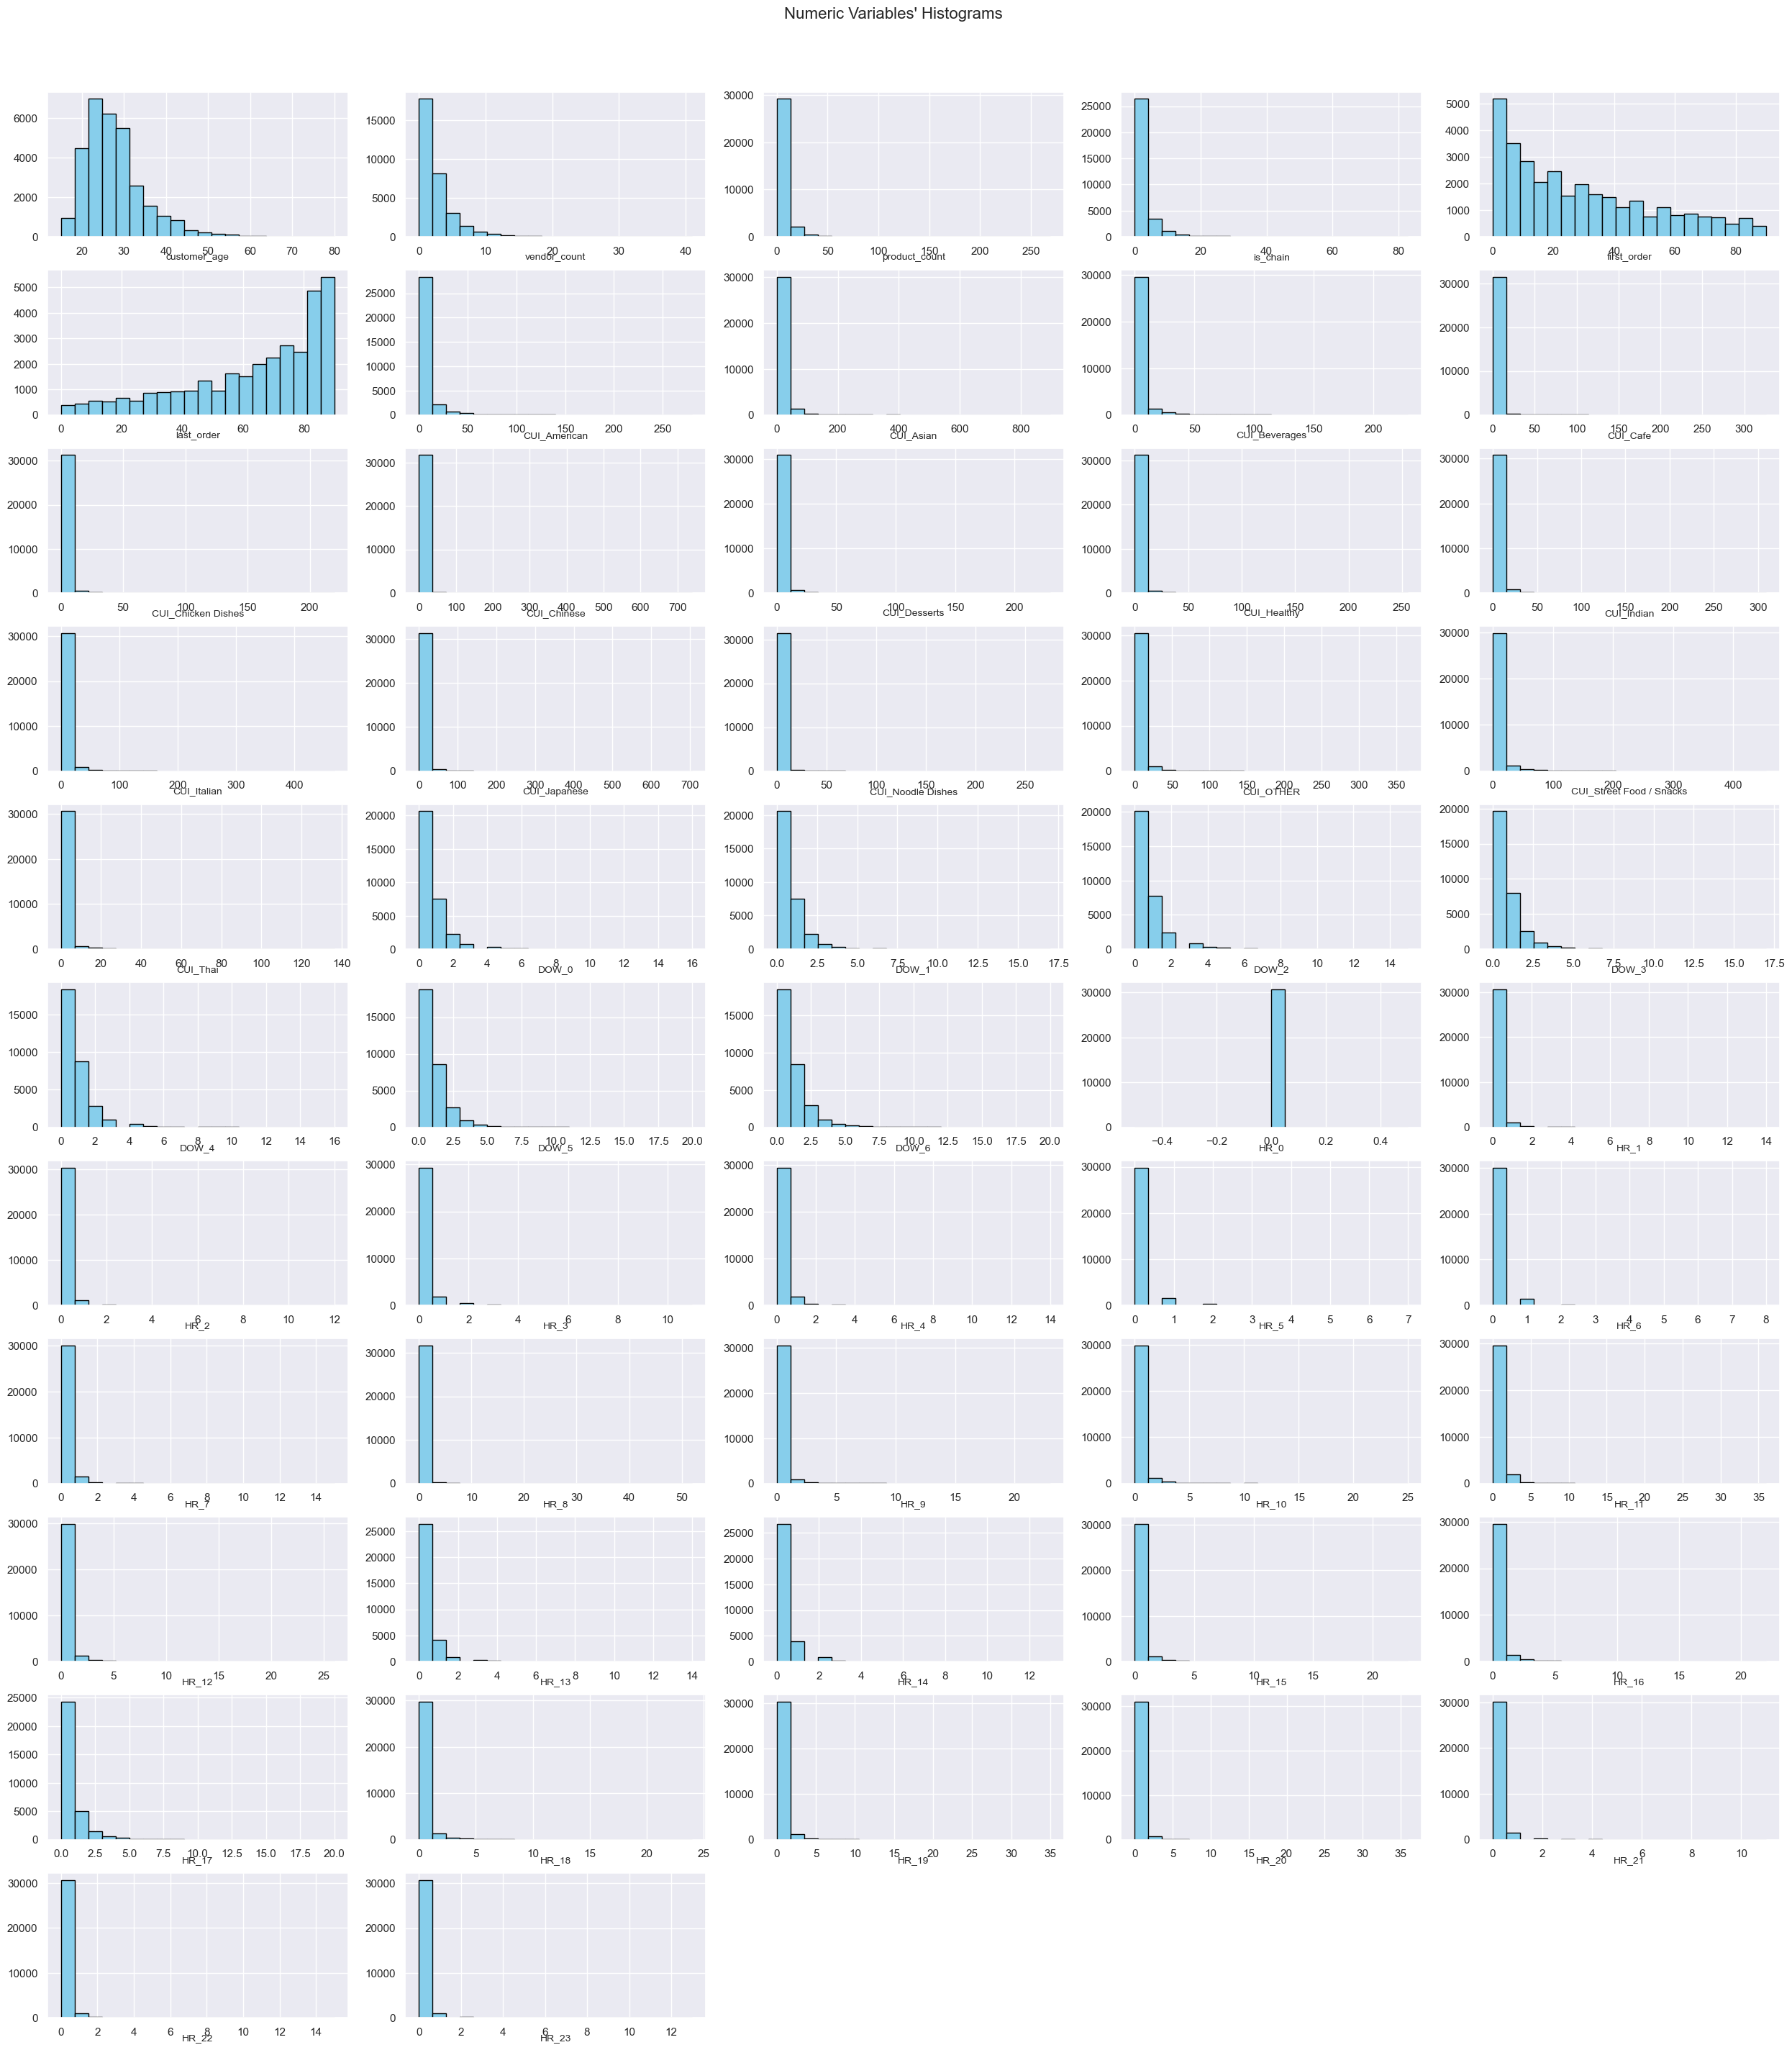

In [40]:
sns.set()

# Set up the figure and axes
rows, cols = 12, 5  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], bins=20, color='skyblue', edgecolor='black')  
    ax.set_title(feat, fontsize=10, y=-0.2)  
    
# Hide any unused subplots if the number of features is less than rows * cols
for ax in axes.flatten()[len(metric_features):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Histograms", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

Plotting variables excluding zero, because it biases the scaling: (used to define outliers threshold)

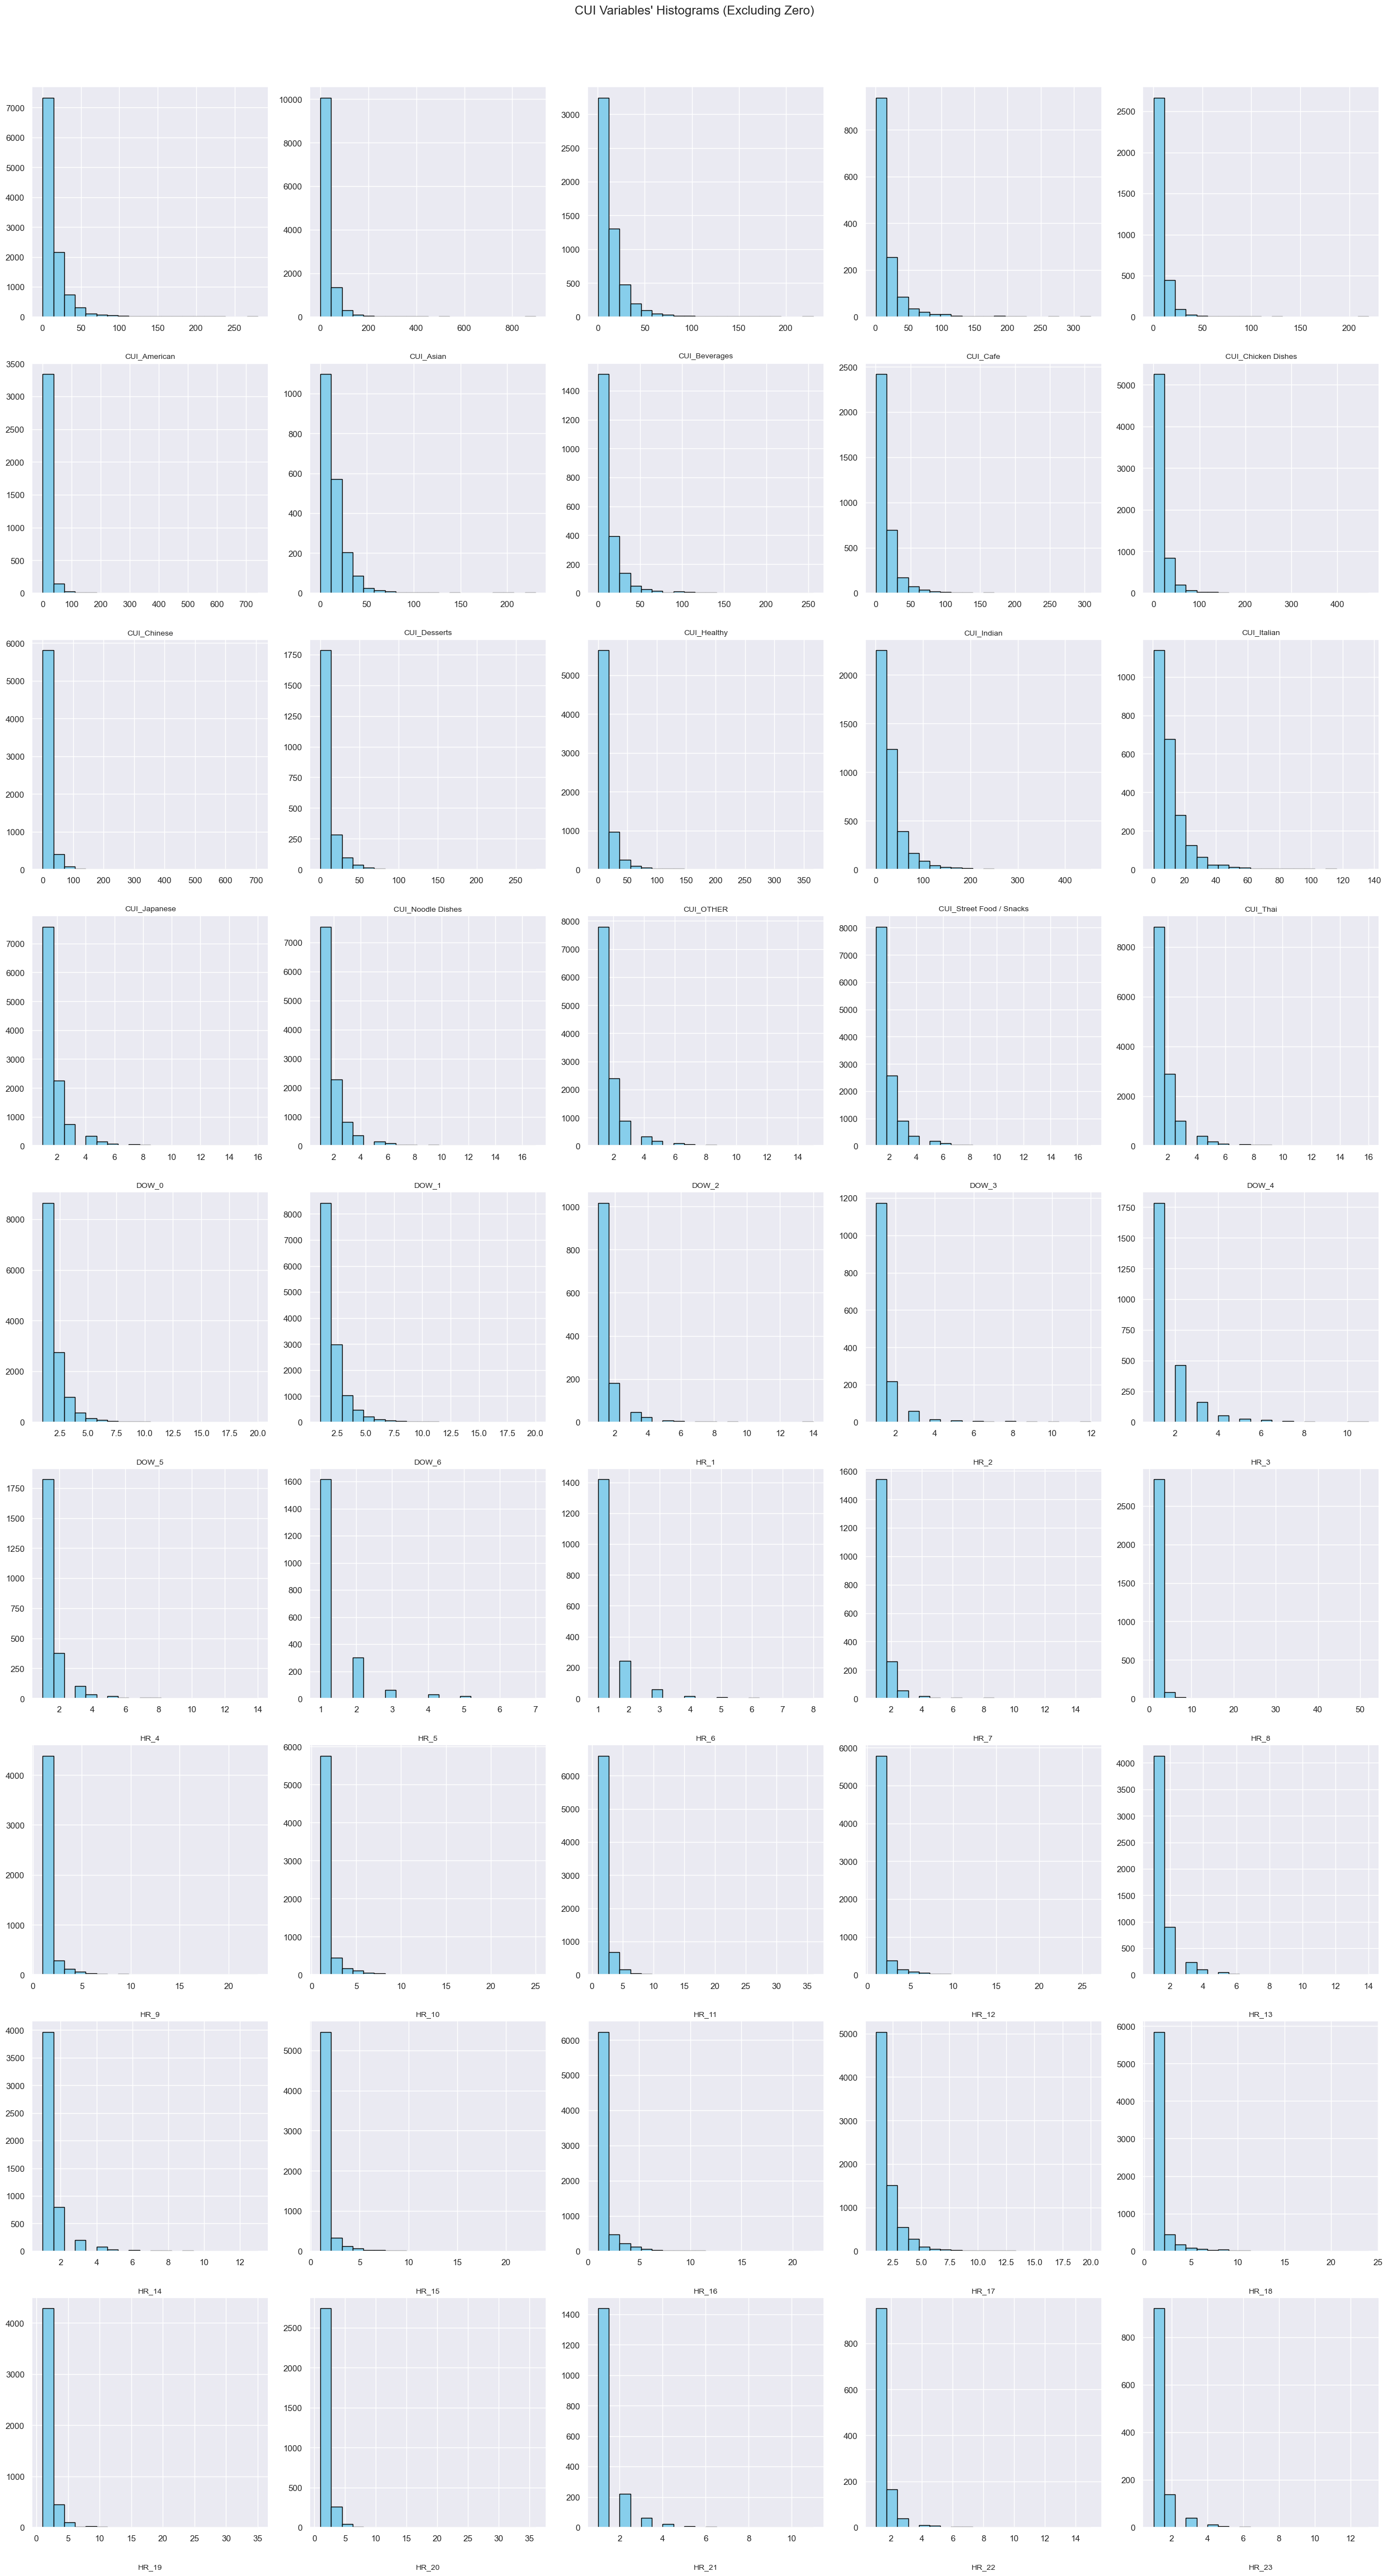

In [41]:
CUI_variables = ["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", 
                 "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", 
                 "CUI_Healthy", "CUI_Indian", "CUI_Italian", "CUI_Japanese", 
                 "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", 
                 "CUI_Thai", "DOW_0" ,"DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6",
                 "HR_1", "HR_2", "HR_3", "HR_4", "HR_5", "HR_6", "HR_7", "HR_8", "HR_9", 
                 "HR_10", "HR_11", "HR_12", "HR_13", "HR_14", "HR_15", "HR_16", "HR_17", "HR_18", 
                 "HR_19", "HR_20", "HR_21", "HR_22", "HR_23"]

sns.set()

# Calculate rows and columns
n_features = len(CUI_variables)
cols = 5  #
rows = -(-n_features // cols)  

# Set up the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5)) 

# Plot each CUI variable
for ax, feat in zip(axes.flatten(), CUI_variables):
    data_no_zero = df[df[feat] != 0][feat] # Exclude zero values
    ax.hist(data_no_zero, bins=20, color='skyblue', edgecolor='black')  
    ax.set_title(feat, fontsize=10, y=-0.2)  

# Hide  unused subplots if the number of CUI variables is less than rows * cols
for ax in axes.flatten()[len(CUI_variables):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("CUI Variables' Histograms (Excluding Zero)", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

##### <span style="color:salmon"> 2.1.2 Categorical features </span>

Now, we do the same for the non-metric features:

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_94525/3232155649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


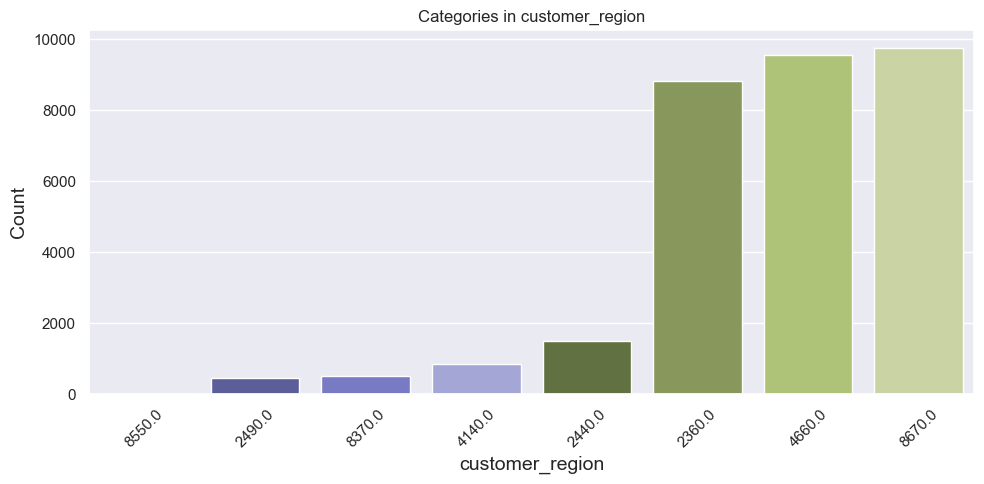

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_94525/3232155649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


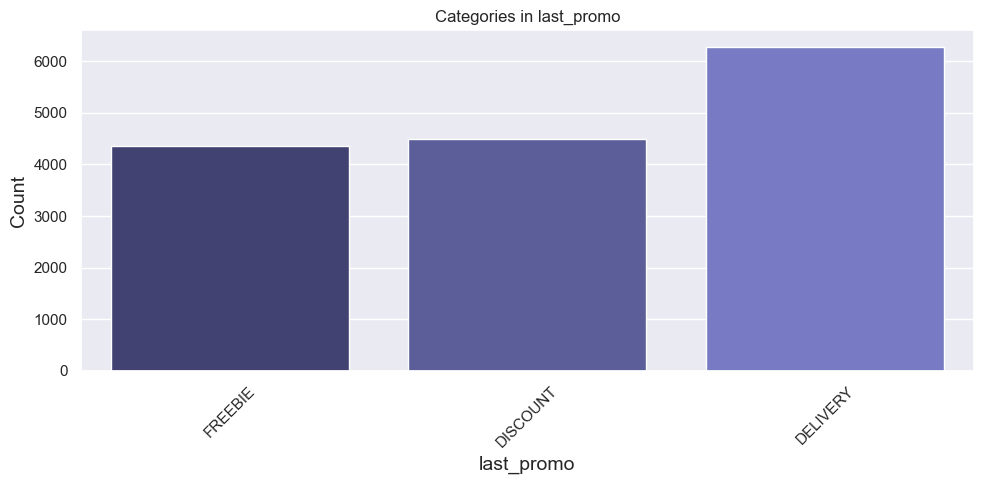

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_94525/3232155649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


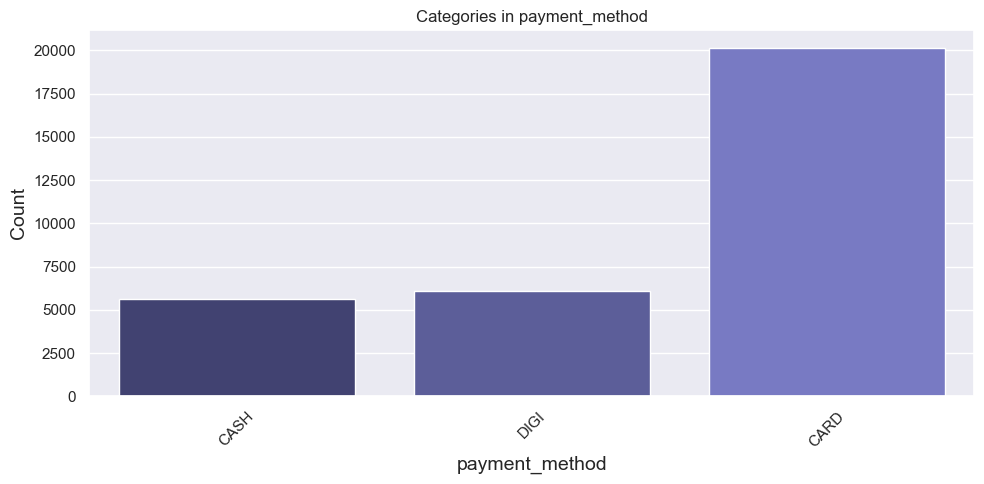

In [42]:
for column in non_metric_features:
    
    categories = df[column].value_counts()

    categories_sorted = categories.sort_values(ascending=True)

    data_filtered = df[df[column].isin(categories_sorted.index)]
    
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  order=categories_sorted.index,  
                  palette='tab20b')
    
  
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Categories in {column}')
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### <span style="color:salmon"> 2.2 Missing Values </span> 

Dealing with missing values effectively is crucial to ensure our dataset's integrity and the accuracy of your analysis. 

In [43]:
# Check percentage of missing values:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Percentage of missing values:
 last_promo         52.530196
HR_0                3.651765
customer_age        2.280784
customer_region     1.386667
first_order         0.332549
dtype: float64


In case of numerical features, the strategie we used to deal with missing values is input with the median:

In [44]:
# Input missing values in numerical features using median:
median_variables = ["customer_age", "HR_0"]
for column in median_variables:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [45]:
# Check percentage of missing values:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Percentage of missing values:
 last_promo         52.530196
customer_region     1.386667
first_order         0.332549
dtype: float64


In case of categorical features, the strategie we used to deal with missing values is input with the mode:

In [46]:
# Input missing values in categorical features using mode:
mode_variables = ["last_promo", "customer_region"]
for column in mode_variables:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [47]:
# Check percentage of missing values:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Percentage of missing values:
 first_order    0.332549
dtype: float64


In [48]:
missing_percentage_first_order = df.loc[df["first_order"].isna()]

In order to threat the missing values in first_order, we use the technique KNNImputer, which for each point with missing values, finds the K nearest neighbors based on a distance metric and replaces the missing value with the average value of the K nearest neighbors. 

In [49]:
# Input missing values in first_order using knn:

knn_rows = df.loc[df["first_order"].isna()]

features_for_imputation = ["last_order", "product_count", "vendor_count", "DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6",  
                            "HR_0", "HR_1", "HR_2", "HR_3", "HR_4", "HR_5", "HR_6", "HR_7", "HR_8", "HR_9", "HR_10", "HR_11", "HR_12", "HR_13", 
                            "HR_14", "HR_15", "HR_16", "HR_17", "HR_18", "HR_19", "HR_20", "HR_21", "HR_22", "HR_23",
                            "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", 
                            "CUI_Healthy", "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]

imputation_data = df.loc[df["first_order"].isna(), features_for_imputation]

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

imputed_values = knn_imputer.fit_transform(imputation_data)

df.loc[df["first_order"].isna(), "first_order"] = imputed_values[:, 0]  

print("Missing values in first_order have been imputed using KNN.")

Missing values in first_order have been imputed using KNN.


Check if missing values have been imputed for first_order:

In [50]:
df.loc[missing_percentage_first_order.index]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31769,8670.0,24.0,1,1,0,0.0,0,DELIVERY,DIGI,0.00,11.87,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31770,4660.0,23.0,1,1,0,0.0,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,14.49,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31771,8670.0,27.0,1,1,1,0.0,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31772,8670.0,36.0,1,1,0,0.0,0,DELIVERY,CARD,0.00,6.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31773,4660.0,22.0,1,1,1,0.0,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
31774,4660.0,30.0,1,1,0,0.0,0,DELIVERY,CARD,0.00,11.93,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31775,8670.0,46.0,1,2,0,0.0,0,DELIVERY,CARD,0.00,30.60,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31776,2360.0,33.0,1,1,1,0.0,0,DELIVERY,CASH,0.00,0.00,0.00,0.0,7.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31777,4660.0,28.0,1,2,1,0.0,0,DISCOUNT,CARD,13.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31778,8670.0,29.0,1,1,0,0.0,0,DELIVERY,CASH,0.00,6.56,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### <span style="color:salmon"> 2.3 Strange values </span> 

Check the stange values Product_count == 0 and vendor_count >= 1:

In [51]:
df.loc[(df["product_count"]==0) & (df["vendor_count"]>=1)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6179,4660.0,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6182,4660.0,43.0,1,0,0,6.0,6,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10993,4660.0,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14135,4660.0,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14609,4660.0,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14637,4660.0,22.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16097,4660.0,27.0,1,0,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17197,4660.0,25.0,1,0,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19969,4660.0,34.0,1,0,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23091,4660.0,21.0,1,0,0,42.0,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Replace product_count = 0 with NaN for these rows:

In [52]:
df.loc[(df["product_count"] == 0) & (df["vendor_count"] >= 1), "product_count"] = np.nan

In [53]:
product_vendor_count_missing = df.loc[(df["product_count"].isna()) & (df["vendor_count"] >= 1)]
product_vendor_count_missing

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6179,4660.0,27.0,1,NaN,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6182,4660.0,43.0,1,NaN,0,6.0,6,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10993,4660.0,36.0,1,NaN,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14135,4660.0,27.0,1,NaN,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14609,4660.0,35.0,1,NaN,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14637,4660.0,22.0,1,NaN,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16097,4660.0,27.0,1,NaN,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17197,4660.0,25.0,1,NaN,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19969,4660.0,34.0,1,NaN,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23091,4660.0,21.0,1,NaN,0,42.0,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Input missing values in product_count using KNNImputer:

In [54]:
knn_rows = df.loc[df["product_count"].isna()]

features_for_imputation = metric_features.drop(["product_count", "customer_age", "is_chain", "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", 
                                                 "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian", "CUI_Japanese", 
                                                 "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"])

imputation_data = df.loc[df["product_count"].isna(), features_for_imputation]

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")




imputed_values = knn_imputer.fit_transform(imputation_data)

df.loc[df["product_count"].isna(), "product_count"] = imputed_values[:, 0]  

print("Missing values in product_count have been imputed using KNN.")

Missing values in product_count have been imputed using KNN.


In [55]:
# Check if missing values have been imputed for product_count:
df.loc[product_vendor_count_missing.index]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6179,4660.0,27.0,1,1.0,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6182,4660.0,43.0,1,1.0,0,6.0,6,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10993,4660.0,36.0,1,1.0,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14135,4660.0,27.0,1,1.0,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14609,4660.0,35.0,1,1.0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14637,4660.0,22.0,1,1.0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16097,4660.0,27.0,1,1.0,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17197,4660.0,25.0,1,1.0,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19969,4660.0,34.0,1,1.0,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23091,4660.0,21.0,1,1.0,0,42.0,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### <span style="color:salmon">2.4 Outliers </span> 

Outliers are data points that deviate significantly from the rest of the observations in a dataset.

 They can result from variability in the data or errors during data collection, entry, or processing.

So, we have to threat them.

##### <span style="color:salmon">2.4.1 Outliers visualization </span> 

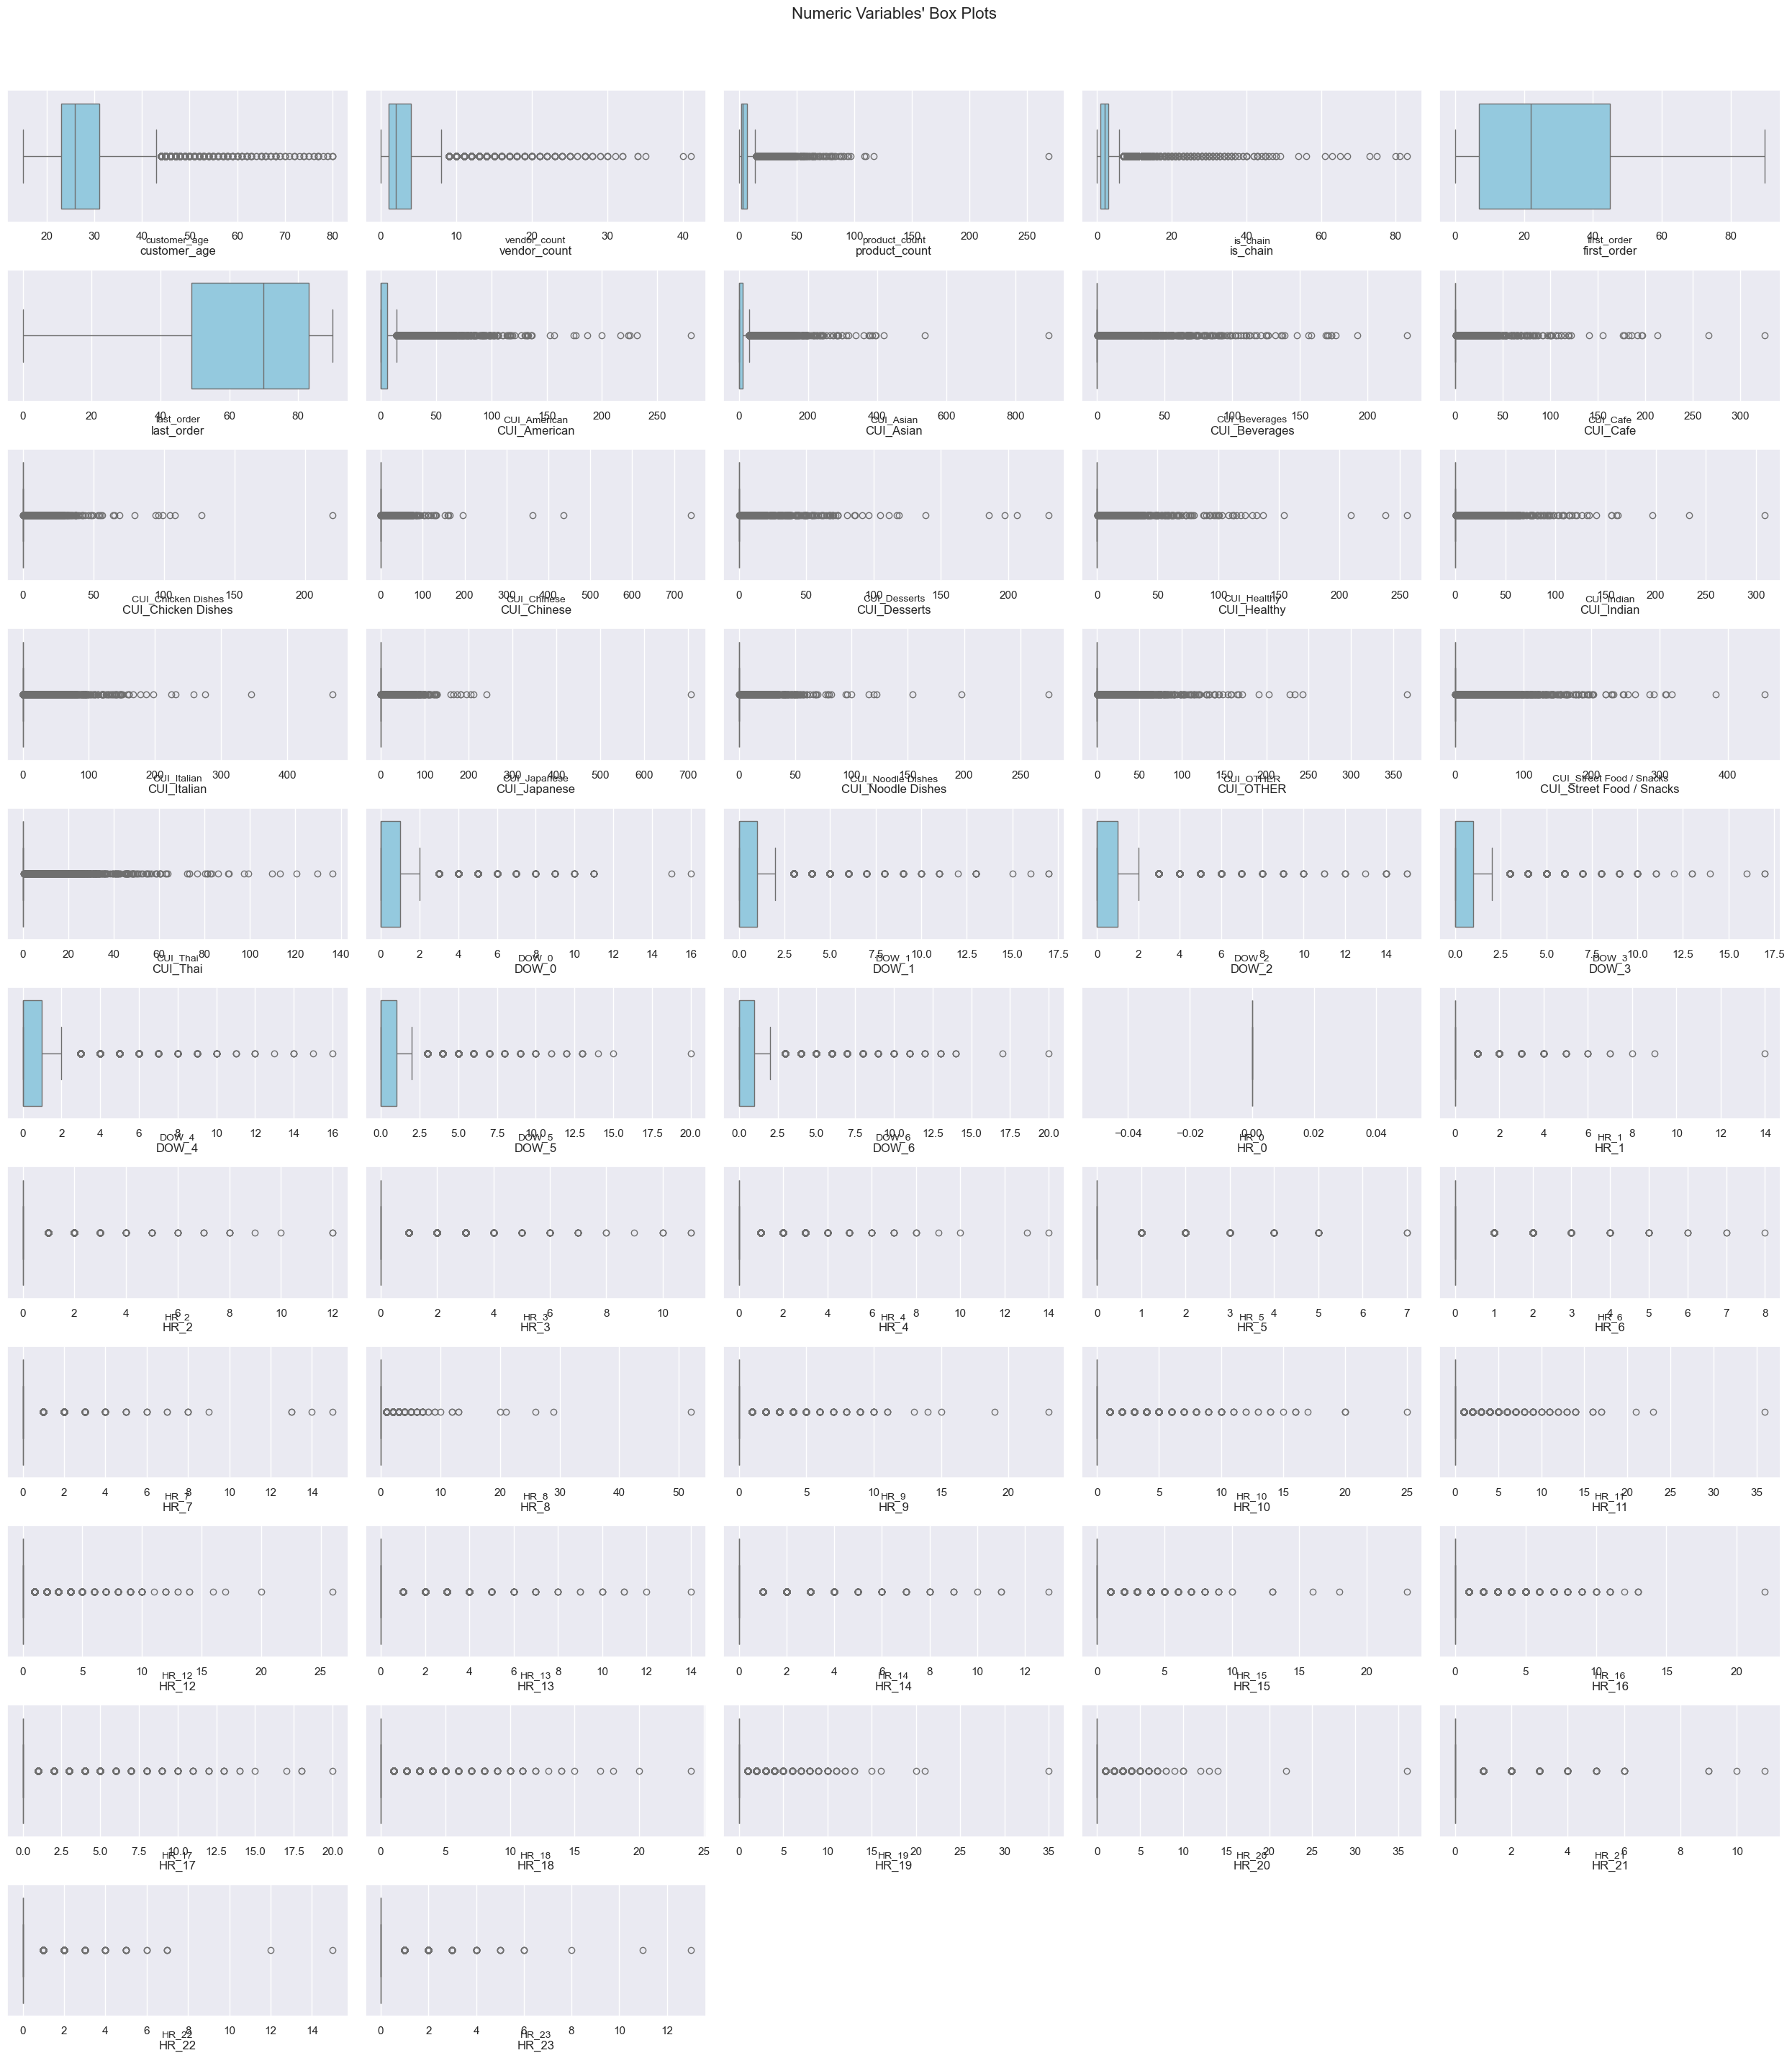

In [56]:
sns.set()

# Set up the figure and axes
rows, cols = 12, 5  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature as a box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=df, x=feat, ax=ax, color='skyblue')  
    ax.set_title(feat, fontsize=10, y=-0.2)  #

# Hide unused subplots:
for ax in axes.flatten()[len(metric_features):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

##### <span style="color:salmon">2.4.2 Outliers removal </span> 

There is two methods to treat with outliers:
1. Automatic method 
2. Manual method

We will try those two and compare which is better in our database.

1. Using the Automatic method:

In [57]:
# Compute the inter-quartile range
q1 = df[metric_features].quantile(0.25)
q3 = df[metric_features].quantile(0.75)
iqr = q3 - q1

# Compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

customer_age               Lower Limit:       11.0      Upper Limit:       43.0
vendor_count               Lower Limit:       -3.5      Upper Limit:        8.5
product_count              Lower Limit:       -5.5      Upper Limit:       14.5
is_chain                   Lower Limit:       -2.0      Upper Limit:        6.0
first_order                Lower Limit:      -50.0      Upper Limit:      102.0
last_order                 Lower Limit:       -2.0      Upper Limit:      134.0
CUI_American               Lower Limit:      -8.49      Upper Limit:      14.15
CUI_Asian                  Lower Limit:    -17.745      Upper Limit: 29.575000000000003
CUI_Beverages              Lower Limit:        0.0      Upper Limit:        0.0
CUI_Cafe                   Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chicken Dishes         Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chinese                Lower Limit:        0.0      Upper Limit:        0.0
CUI_Desserts               Lower

Observations in which all features are outliers:

In [58]:
def identify_outliers(dataframe, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in dataframe.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(dataframe[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in dataframe.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in dataframe.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(df, metric_features, lower_lim, upper_lim)

Total outliers in customer_age: 1083
Total outliers in vendor_count: 1523
Total outliers in product_count: 2370
Total outliers in is_chain: 3154
Total outliers in first_order: 0
Total outliers in last_order: 0
Total outliers in CUI_American: 3507
Total outliers in CUI_Asian: 3472
Total outliers in CUI_Beverages: 5431
Total outliers in CUI_Cafe: 1366
Total outliers in CUI_Chicken Dishes: 3248
Total outliers in CUI_Chinese: 3522
Total outliers in CUI_Desserts: 2016
Total outliers in CUI_Healthy: 2169
Total outliers in CUI_Indian: 3448
Total outliers in CUI_Italian: 6448
Total outliers in CUI_Japanese: 6300
Total outliers in CUI_Noodle Dishes: 2226
Total outliers in CUI_OTHER: 7041
Total outliers in CUI_Street Food / Snacks: 4244
Total outliers in CUI_Thai: 2378
Total outliers in DOW_0: 1405
Total outliers in DOW_1: 1495
Total outliers in DOW_2: 1587
Total outliers in DOW_3: 1653
Total outliers in DOW_4: 1784
Total outliers in DOW_5: 1707
Total outliers in DOW_6: 1978
Total outliers in HR

Conclusion: There is no observation in which all features are outliers. Since there is no outlier in 'HR_0', 'last_order', 'first_order'.

Check if there is any observation only with outliers, except on these features.

In [59]:
metric_features_test = metric_features.drop(['HR_0', 'last_order', 'first_order'])
outliers, obvious_outliers = identify_outliers(df, metric_features_test, lower_lim, upper_lim)

Total outliers in customer_age: 1083
Total outliers in vendor_count: 1523
Total outliers in product_count: 2370
Total outliers in is_chain: 3154
Total outliers in CUI_American: 3507
Total outliers in CUI_Asian: 3472
Total outliers in CUI_Beverages: 5431
Total outliers in CUI_Cafe: 1366
Total outliers in CUI_Chicken Dishes: 3248
Total outliers in CUI_Chinese: 3522
Total outliers in CUI_Desserts: 2016
Total outliers in CUI_Healthy: 2169
Total outliers in CUI_Indian: 3448
Total outliers in CUI_Italian: 6448
Total outliers in CUI_Japanese: 6300
Total outliers in CUI_Noodle Dishes: 2226
Total outliers in CUI_OTHER: 7041
Total outliers in CUI_Street Food / Snacks: 4244
Total outliers in CUI_Thai: 2378
Total outliers in DOW_0: 1405
Total outliers in DOW_1: 1495
Total outliers in DOW_2: 1587
Total outliers in DOW_3: 1653
Total outliers in DOW_4: 1784
Total outliers in DOW_5: 1707
Total outliers in DOW_6: 1978
Total outliers in HR_1: 1283
Total outliers in HR_2: 1490
Total outliers in HR_3: 252

Conclusion: There is no observation with outliers in all features.

Observations in which at least one feature is an outlier:

In [60]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(df[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [61]:
filters_iqr_all

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [62]:
len(df[~filters_iqr_all])
# Number of observations with at least one features considered an outlier
percentage_outliers = len(df[filters_iqr_all])/len(df)*100
percentage_data_kept = round(100 - percentage_outliers, 5)
print(f"Percentage of observations with at least one features considered an outlier: {percentage_outliers}%")
print(f"Percentage of data kept after removing outliers: {percentage_data_kept}%")

Percentage of observations with at least one features considered an outlier: 0.0%
Percentage of data kept after removing outliers: 100.0%


Conclusion: All observations have outliers in some feature

2. Using the manual method:

In [63]:
filters_manual1 = (
                (df["customer_age"] <= 70) #??
                &
                (df["vendor_count"] <= 30) #??
                &
                (df["product_count"] <= 100)                            
                &
                (df["is_chain"] <= 55)                                  
                &
                (df["CUI_American"] <= 150)
                &
                (df["CUI_Asian"] <= 450)                            
                &
                (df["CUI_Beverages"] <= 150)  
                &
                (df["CUI_Cafe"] <= 140)
                &
                (df["CUI_Chicken Dishes"] <= 70)                            
                &
                (df["CUI_Chinese"] <= 200)                                  
                &
                (df["CUI_Desserts"] <= 80)
                &
                (df["CUI_Healthy"] <= 150)                            
                &
                (df["CUI_Indian"] <= 150)
                &
                (df["CUI_Italian"] <= 200)
                &
                (df["CUI_Japanese"] <= 150)
                &
                (df["CUI_Noodle Dishes"] <= 90)
                &
                (df["CUI_OTHER"] <= 180)
                &
                (df["CUI_Street Food / Snacks"] <= 210)
                &
                (df["CUI_Thai"] <= 70)
                &
                (df["DOW_0"] <= 12)
                &
                (df["DOW_1"] <= 14)
                &
                (df["DOW_2"] <= 10) #(??)
                &
                (df["DOW_3"] <= 12)
                &
                (df["DOW_4"] <=12) #(??)
                &
                (df["DOW_5"] <= 12) #(??)
                &
                (df["DOW_6"] <= 15)
                &
                (df["HR_1"] <= 10)                                  
                &
                (df["HR_2"] < 8)
                &
                (df["HR_3"] <= 8) #(??)                            
                &
                (df["HR_4"] <= 8)                       
                &
                (df["HR_5"] <= 5)                                  
                &
                (df["HR_6"] <= 6)
                &
                (df["HR_7"] <= 10)                            
                &
                (df["HR_8"] <= 19)  
                &
                (df["HR_9"] <= 12)
                &
                (df["HR_10"] < 15)                            
                &
                (df["HR_11"] <= 15)                                  
                &
                (df["HR_12"] <= 15)
                &
                (df["HR_13"] <= 10)                            
                &
                (df["HR_14"] <= 10) 
                &
                (df["HR_15"] <= 12)  
                &
                (df["HR_16"] <= 15)
                &
                (df["HR_17"] <= 16)
                &
                (df["HR_18"] <= 15)                                  
                &
                (df["HR_19"] <= 15)
                &
                (df["HR_20"] <= 15)                            
                &
                (df["HR_21"] <= 7)
                &
                (df["HR_22"] <= 8)
                &
                (df["HR_23"] <= 7)    
)                     

df_out_man1 = df[filters_manual1]

In [64]:
print('Percentage of data kept after removing outliers:', 100*(np.round(df_out_man1.shape[0] / df.shape[0], decimals=5)))

Percentage of data kept after removing outliers: 99.266


In [65]:
filters_manual2 = (
                (df["customer_age"] <= 70) 
                &
                (df["vendor_count"] <= 35) 
                &
                (df["product_count"] <= 80)                          
                &
                (df["is_chain"] <= 40)                                 
                &
                (df["CUI_American"] <= 100)
                &
                (df["CUI_Asian"] <= 300) #200                           
                &
                (df["CUI_Beverages"] <= 100)  
                &
                (df["CUI_Cafe"] <= 120)  
                &
                (df["CUI_Chicken Dishes"] <= 55) #50                           
                &
                (df["CUI_Chinese"] <= 150)                                
                &
                (df["CUI_Desserts"] <= 70) #100
                &
                (df["CUI_Healthy"] <= 120)                           
                &
                (df["CUI_Indian"] <= 120)  
                &
                (df["CUI_Italian"] <= 150)
                &
                (df["CUI_Japanese"] <= 120) 
                &
                (df["CUI_Noodle Dishes"] <= 70)
                &
                (df["CUI_OTHER"] <= 120)
                &
                (df["CUI_Street Food / Snacks"] <= 200)
                &
                (df["CUI_Thai"] <= 60)
                &
                (df["DOW_0"] <= 12) #8
                &
                (df["DOW_1"] <= 12) #8
                &
                (df["DOW_2"] <= 12) #8
                &
                (df["DOW_3"] <= 12) #8
                &
                (df["DOW_4"] <=12) #8
                &
                (df["DOW_5"] <= 13) #8
                &
                (df["DOW_6"] <= 13) #10
                &
                (df["HR_1"] <= 8)                                 
                &
                (df["HR_2"] < 8) 
                &
                (df["HR_3"] <= 8)                             
                &
                (df["HR_4"] < 10)                       
                &
                (df["HR_5"] < 5)                                  
                &
                (df["HR_6"] <= 5)
                &
                (df["HR_7"] <= 5)                            
                &
                (df["HR_8"] <= 15)  #10
                &
                (df["HR_9"] <= 13) #10
                &
                (df["HR_10"] < 15) #10                         
                &
                (df["HR_11"] <= 15)  #10                                
                &
                (df["HR_12"] < 10) #10
                &
                (df["HR_13"] < 8)  #6                          
                &
                (df["HR_14"] < 8) 
                &
                (df["HR_15"] < 10)  
                &
                (df["HR_16"] <= 15) #10
                &
                (df["HR_17"] < 15) #10
                &
                (df["HR_18"] < 12) #10                                 
                &
                (df["HR_19"] < 15) 
                &
                (df["HR_20"] < 10)                            
                &
                (df["HR_21"] < 6)
                &
                (df["HR_22"] < 8)
                &
                (df["HR_23"] < 6)    
)                     

df_out_man2 = df[filters_manual2]

In [66]:
print('Percentage of data kept after removing outliers:', 100*(np.round(df_out_man2.shape[0] / df.shape[0], decimals=5)))

Percentage of data kept after removing outliers: 98.736


In [67]:
filters_manual3 = (
                (df["customer_age"] <= 70) 
                &
                (df["vendor_count"] <= 35) 
                &
                (df["product_count"] <= 80)                          
                &
                (df["is_chain"] <= 40)                                 
                &
                (df["CUI_American"] <= 100)
                &
                (df["CUI_Asian"] <= 200) #200                           
                &
                (df["CUI_Beverages"] <= 100)  
                &
                (df["CUI_Cafe"] <= 120)  
                &
                (df["CUI_Chicken Dishes"] <= 50) #50                           
                &
                (df["CUI_Chinese"] <= 150)                                
                &
                (df["CUI_Desserts"] <= 100) #100
                &
                (df["CUI_Healthy"] <= 120)                           
                &
                (df["CUI_Indian"] <= 120)  
                &
                (df["CUI_Italian"] <= 150)
                &
                (df["CUI_Japanese"] <= 120) 
                &
                (df["CUI_Noodle Dishes"] <= 70)
                &
                (df["CUI_OTHER"] <= 120)
                &
                (df["CUI_Street Food / Snacks"] <= 200)
                &
                (df["CUI_Thai"] <= 60)
                &
                (df["DOW_0"] <= 8) #8
                &
                (df["DOW_1"] <= 8) #8
                &
                (df["DOW_2"] <= 8) #8
                &
                (df["DOW_3"] <= 8) #8
                &
                (df["DOW_4"] <=8) #8
                &
                (df["DOW_5"] <=8) #8
                &
                (df["DOW_6"] <= 10) #10
                &
                (df["HR_1"] <= 8)                                 
                &
                (df["HR_2"] < 8) 
                &
                (df["HR_3"] <= 8)                             
                &
                (df["HR_4"] < 10)                       
                &
                (df["HR_5"] < 5)                                  
                &
                (df["HR_6"] <= 5)
                &
                (df["HR_7"] <= 5)                            
                &
                (df["HR_8"] <= 10)  #10
                &
                (df["HR_9"] <= 10) #10
                &
                (df["HR_10"] < 10) #10                         
                &
                (df["HR_11"] <= 10)  #10                                
                &
                (df["HR_12"] < 10) #10
                &
                (df["HR_13"] < 6)  #6                          
                &
                (df["HR_14"] < 8) 
                &
                (df["HR_15"] < 10)  
                &
                (df["HR_16"] <= 10) #10
                &
                (df["HR_17"] < 10) #10
                &
                (df["HR_18"] < 10) #10                                 
                &
                (df["HR_19"] < 15) 
                &
                (df["HR_20"] < 10)                            
                &
                (df["HR_21"] < 6)
                &
                (df["HR_22"] < 8)
                &
                (df["HR_23"] < 6)    
)                     

df_out_man3 = df[filters_manual3]

In [68]:
# Number of observations with at least one features considered an outlier
percentage_data_kept_manual = 100*(np.round(df_out_man3.shape[0] / df.shape[0], decimals=5))
percentage_outliers_manual = round(100 - percentage_data_kept_manual, 5)
print(f"Percentage of observations with at least one features considered an outlier: {percentage_outliers_manual}%")
print(f"Percentage of data kept after removing outliers: {percentage_data_kept_manual}%")

Percentage of observations with at least one features considered an outlier: 1.722%
Percentage of data kept after removing outliers: 98.27799999999999%


We conclude that we should see what is common to both methods and remove only that because the automatic method is removing a very high percentage of the data.

In [69]:
df = df[(filters_iqr_all | filters_manual3)]

In [70]:
# Store in df_preprocessing the DataFrame of our dataset df
df_preprocessing = pd.DataFrame(df)

# Save to CSV
df_preprocessing.to_csv('../dataset/df_preprocessing.csv', index=False)